In [3]:
!pip install matplotlib
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df_cars= pd.read_csv('../vehicles_us.csv')

In [5]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [6]:
df_cars.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [7]:
df_cars.sample(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
7999,26900,2015.0,jeep wrangler,excellent,6.0,gas,72047.0,automatic,SUV,white,1.0,2018-11-13,128
39561,27800,2016.0,ford f150 supercrew cab xlt,good,6.0,gas,47570.0,other,pickup,white,1.0,2018-06-12,78
7728,2700,2004.0,ford explorer,good,6.0,gas,194555.0,automatic,SUV,green,1.0,2018-12-14,126
44233,4650,1996.0,ford mustang,good,8.0,gas,NaN,automatic,convertible,black,NaN,2018-09-11,4
7862,8000,1993.0,jeep cherokee,excellent,6.0,gas,NaN,manual,SUV,NaN,1.0,2018-09-29,53


<Axes: ylabel='Frequency'>

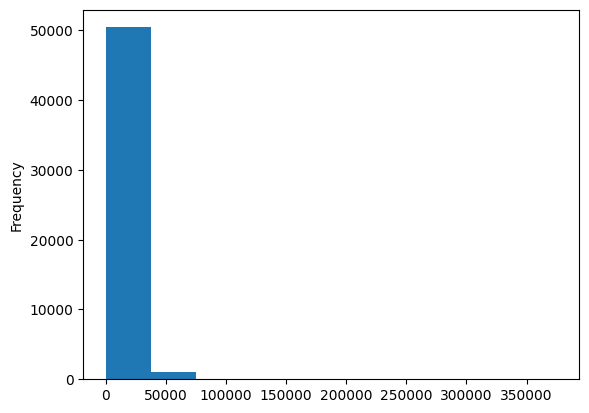

In [8]:
df_cars['price'].plot(kind='hist')